In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import execute, Aer, BasicAer, IBMQ
from qiskit.circuit import Gate
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
qr0 = QuantumRegister(4, 'qr0')
rg0 = QuantumCircuit(qr0, name="Reversible Gate")

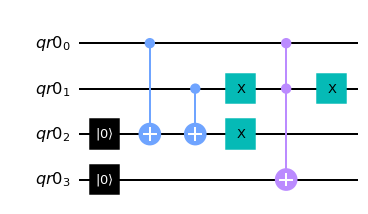

In [3]:
rg0.reset(qr0[2])
rg0.reset(qr0[3])
rg0.cx(qr0[0],qr0[2])
rg0.cx(qr0[1],qr0[2])
rg0.x(qr0[1])
rg0.ccx(qr0[0],qr0[1],qr0[3])
rg0.x(qr0[1])
rg0.x(qr0[2])

rg0.draw(output='mpl')

In [4]:
reg0 = rg0.to_instruction()

In [5]:
q1 = QuantumRegister(16, 'q2')
a0 = QuantumCircuit(q1, name='Comparator')

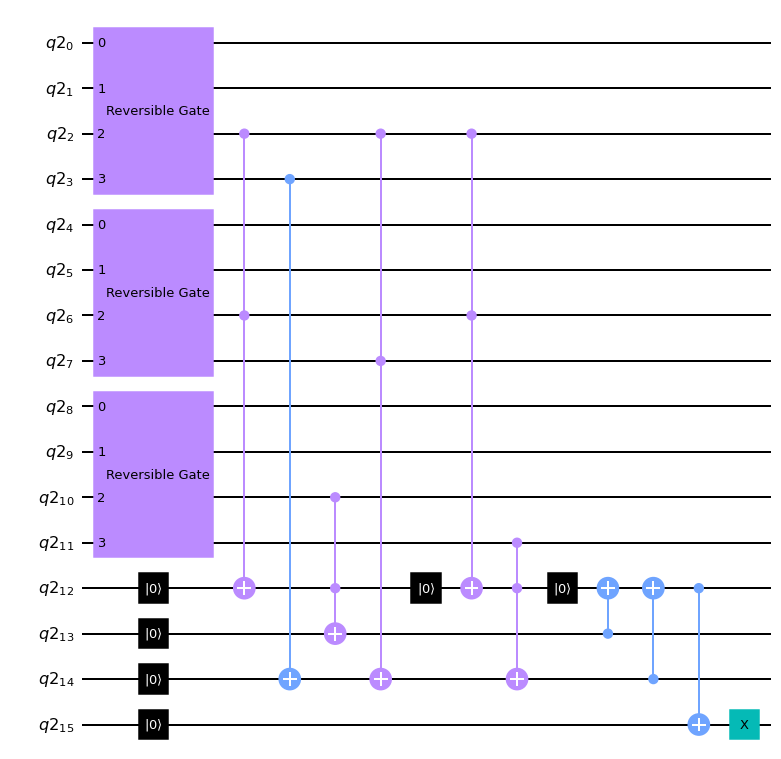

In [6]:
a0.append(reg0, [q1[0],q1[1],q1[2],q1[3]])
a0.append(reg0, [q1[4],q1[5],q1[6],q1[7]])
a0.append(reg0, [q1[8],q1[9],q1[10],q1[11]])
a0.reset(q1[12])
a0.reset(q1[13])
a0.reset(q1[14])
a0.reset(q1[15])
a0.ccx(q1[2],q1[6],q1[12])
a0.ccx(q1[10],q1[12],q1[13])
a0.cx(q1[3],q1[14])
a0.ccx(q1[2],q1[7],q1[14])
a0.reset(q1[12])
a0.ccx(q1[2],q1[6],q1[12])
a0.ccx(q1[11],q1[12],q1[14])
a0.reset(q1[12])
a0.cx(q1[13],q1[12])
a0.cx(q1[14],q1[12])
a0.cx(q1[12],q1[15])
a0.x(q1[15])


a0.draw(output='mpl')

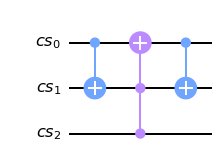

In [7]:
comp = a0.to_instruction()

cs = QuantumRegister(3, 'cs')
cso = QuantumCircuit(cs, name='Swap')

cso.cx(cs[0],cs[1])
cso.ccx(cs[2],cs[1],cs[0])
cso.cx(cs[0],cs[1])

cso.draw(output='mpl')

In [8]:
cswap = cso.to_instruction()

cir = QuantumRegister(64, 'cs')
clc1 = ClassicalRegister(3, 'clc1')
clc2 = ClassicalRegister(3, 'clc2')
clc3 = ClassicalRegister(3, 'clc3')
clc4 = ClassicalRegister(3, 'clc4')
clc5 = ClassicalRegister(3, 'clc5')
clc6 = ClassicalRegister(3, 'clc6')
clc7 = ClassicalRegister(3, 'clc7')
clc8 = ClassicalRegister(3, 'clc8')
circ = QuantumCircuit(cir,clc1,clc2,clc3,clc4,clc5,clc6,clc7,clc8, name='Sort')

In [9]:
inp1 = input("Enter I0 : ")
inp2 = input("Enter I1 : ")
inp3 = input("Enter I2 : ")
inp4 = input("Enter I3 : ")
inp5 = input("Enter I4 : ")
inp6 = input("Enter I5 : ")
inp7 = input("Enter I6 : ")
inp8 = input("Enter I7 : ")


if inp1[0] == "1":
    circ.x(cir[0])
if inp1[1] == "1":
    circ.x(cir[4])
if inp1[2] == "1":
    circ.x(cir[8])
if inp2[0] == "1":
    circ.x(cir[1])
if inp2[1] == "1":
    circ.x(cir[5])
if inp2[2] == "1":
    circ.x(cir[9])
if inp3[0] == "1":
    circ.x(cir[16])
if inp3[1] == "1":
    circ.x(cir[20])
if inp3[2] == "1":
    circ.x(cir[24])
if inp4[0] == "1":
    circ.x(cir[17])
if inp4[1] == "1":
    circ.x(cir[21])
if inp4[2] == "1":
    circ.x(cir[25])
if inp5[0] == "1":
    circ.x(cir[32])
if inp5[1] == "1":
    circ.x(cir[36])
if inp5[2] == "1":
    circ.x(cir[40])
if inp6[0] == "1":
    circ.x(cir[33])
if inp6[1] == "1":
    circ.x(cir[37])
if inp6[2] == "1":
    circ.x(cir[41])
if inp7[0] == "1":
    circ.x(cir[48])
if inp7[1] == "1":
    circ.x(cir[52])
if inp7[2] == "1":
    circ.x(cir[56])
if inp8[0] == "1":
    circ.x(cir[49])
if inp8[1] == "1":
    circ.x(cir[53])
if inp8[2] == "1":
    circ.x(cir[57])

Enter I0 :  101
Enter I1 :  111
Enter I2 :  010
Enter I3 :  011
Enter I4 :  000
Enter I5 :  100
Enter I6 :  001
Enter I7 :  110


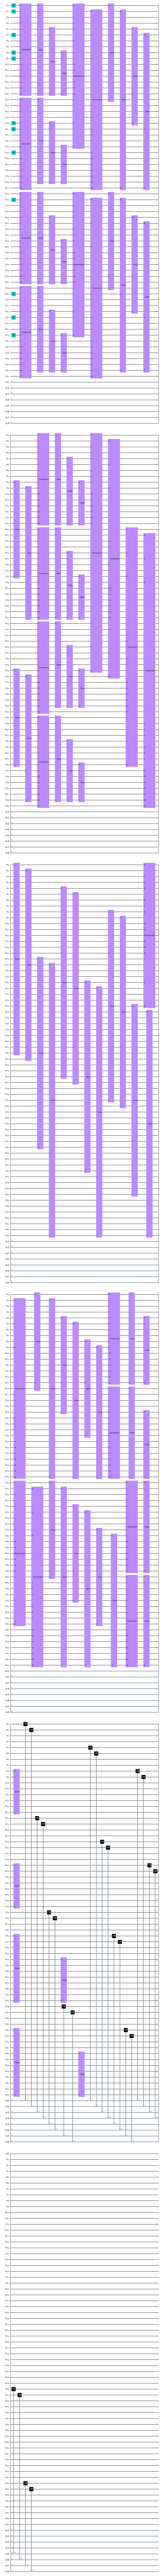

In [10]:
circ.append(comp, [cir[0],cir[1],cir[2],cir[3],cir[4],cir[5],cir[6],cir[7],cir[8],cir[9],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[1],cir[15]])
circ.append(cswap, [cir[4],cir[5],cir[15]])
circ.append(cswap, [cir[8],cir[9],cir[15]])
circ.append(comp, [cir[16],cir[17],cir[18],cir[19],cir[20],cir[21],cir[22],cir[23],cir[24],cir[25],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[16],cir[17],cir[30]])
circ.append(cswap, [cir[20],cir[21],cir[30]])
circ.append(cswap, [cir[24],cir[25],cir[30]])
circ.append(comp, [cir[32],cir[33],cir[34],cir[35],cir[36],cir[37],cir[38],cir[39],cir[40],cir[41],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[32],cir[33],cir[47]])
circ.append(cswap, [cir[36],cir[37],cir[47]])
circ.append(cswap, [cir[40],cir[41],cir[47]])
circ.append(comp, [cir[48],cir[49],cir[50],cir[51],cir[52],cir[53],cir[54],cir[55],cir[56],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[48],cir[49],cir[62]])
circ.append(cswap, [cir[52],cir[53],cir[62]])
circ.append(cswap, [cir[56],cir[57],cir[62]])

circ.append(comp, [cir[0],cir[16],cir[2],cir[3],cir[4],cir[20],cir[6],cir[7],cir[8],cir[24],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[16],cir[15]])
circ.append(cswap, [cir[4],cir[20],cir[15]])
circ.append(cswap, [cir[8],cir[24],cir[15]])
circ.append(comp, [cir[1],cir[17],cir[18],cir[19],cir[5],cir[21],cir[22],cir[23],cir[9],cir[25],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[1],cir[17],cir[31]])
circ.append(cswap, [cir[5],cir[21],cir[31]])
circ.append(cswap, [cir[9],cir[25],cir[31]])
circ.append(comp, [cir[32],cir[48],cir[34],cir[35],cir[36],cir[52],cir[38],cir[39],cir[40],cir[56],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[32],cir[48],cir[46]])
circ.append(cswap, [cir[36],cir[52],cir[46]])
circ.append(cswap, [cir[40],cir[56],cir[46]])
circ.append(comp, [cir[33],cir[49],cir[50],cir[51],cir[37],cir[53],cir[54],cir[55],cir[41],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[33],cir[49],cir[62]])
circ.append(cswap, [cir[37],cir[53],cir[62]])
circ.append(cswap, [cir[41],cir[57],cir[62]])

circ.append(comp, [cir[0],cir[1],cir[2],cir[3],cir[4],cir[5],cir[6],cir[7],cir[8],cir[9],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[1],cir[15]])
circ.append(cswap, [cir[4],cir[5],cir[15]])
circ.append(cswap, [cir[8],cir[9],cir[15]])
circ.append(comp, [cir[16],cir[17],cir[18],cir[19],cir[20],cir[21],cir[22],cir[23],cir[24],cir[25],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[16],cir[17],cir[31]])
circ.append(cswap, [cir[20],cir[21],cir[31]])
circ.append(cswap, [cir[24],cir[25],cir[31]])
circ.append(comp, [cir[32],cir[33],cir[34],cir[35],cir[36],cir[37],cir[38],cir[39],cir[40],cir[41],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[32],cir[33],cir[46]])
circ.append(cswap, [cir[36],cir[37],cir[46]])
circ.append(cswap, [cir[40],cir[41],cir[46]])
circ.append(comp, [cir[48],cir[49],cir[50],cir[51],cir[52],cir[53],cir[54],cir[55],cir[56],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[48],cir[49],cir[62]])
circ.append(cswap, [cir[52],cir[53],cir[62]])
circ.append(cswap, [cir[56],cir[57],cir[62]])

circ.append(comp, [cir[0],cir[32],cir[2],cir[3],cir[4],cir[36],cir[6],cir[7],cir[8],cir[40],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[32],cir[15]])
circ.append(cswap, [cir[4],cir[36],cir[15]])
circ.append(cswap, [cir[8],cir[40],cir[15]])
circ.append(comp, [cir[1],cir[33],cir[18],cir[19],cir[5],cir[37],cir[22],cir[23],cir[9],cir[41],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[1],cir[33],cir[31]])
circ.append(cswap, [cir[5],cir[37],cir[31]])
circ.append(cswap, [cir[9],cir[41],cir[31]])
circ.append(comp, [cir[16],cir[48],cir[34],cir[35],cir[20],cir[52],cir[38],cir[39],cir[24],cir[56],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[16],cir[48],cir[47]])
circ.append(cswap, [cir[20],cir[52],cir[47]])
circ.append(cswap, [cir[24],cir[56],cir[47]])
circ.append(comp, [cir[17],cir[49],cir[50],cir[51],cir[21],cir[53],cir[54],cir[55],cir[25],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[17],cir[49],cir[63]])
circ.append(cswap, [cir[21],cir[53],cir[63]])
circ.append(cswap, [cir[25],cir[57],cir[63]])

circ.append(comp, [cir[0],cir[16],cir[2],cir[3],cir[4],cir[20],cir[6],cir[7],cir[8],cir[24],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[16],cir[15]])
circ.append(cswap, [cir[4],cir[20],cir[15]])
circ.append(cswap, [cir[8],cir[24],cir[15]])
circ.append(comp, [cir[1],cir[17],cir[18],cir[19],cir[5],cir[21],cir[22],cir[23],cir[9],cir[25],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[1],cir[17],cir[31]])
circ.append(cswap, [cir[5],cir[21],cir[31]])
circ.append(cswap, [cir[9],cir[25],cir[31]])
circ.append(comp, [cir[32],cir[48],cir[34],cir[35],cir[36],cir[52],cir[38],cir[39],cir[40],cir[56],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[32],cir[48],cir[47]])
circ.append(cswap, [cir[36],cir[52],cir[47]])
circ.append(cswap, [cir[40],cir[56],cir[47]])
circ.append(comp, [cir[33],cir[49],cir[50],cir[51],cir[37],cir[53],cir[54],cir[55],cir[41],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[33],cir[49],cir[63]])
circ.append(cswap, [cir[37],cir[53],cir[63]])
circ.append(cswap, [cir[41],cir[57],cir[63]])

circ.append(comp, [cir[0],cir[1],cir[2],cir[3],cir[4],cir[5],cir[6],cir[7],cir[8],cir[9],cir[10],cir[11],cir[12],cir[13],cir[14],cir[15]])
circ.append(cswap, [cir[0],cir[1],cir[15]])
circ.append(cswap, [cir[4],cir[5],cir[15]])
circ.append(cswap, [cir[8],cir[9],cir[15]])
circ.append(comp, [cir[16],cir[17],cir[18],cir[19],cir[20],cir[21],cir[22],cir[23],cir[24],cir[25],cir[26],cir[27],cir[28],cir[29],cir[30],cir[31]])
circ.append(cswap, [cir[16],cir[17],cir[31]])
circ.append(cswap, [cir[20],cir[21],cir[31]])
circ.append(cswap, [cir[24],cir[25],cir[31]])
circ.append(comp, [cir[32],cir[33],cir[34],cir[35],cir[36],cir[37],cir[38],cir[39],cir[40],cir[41],cir[42],cir[43],cir[44],cir[45],cir[46],cir[47]])
circ.append(cswap, [cir[32],cir[33],cir[47]])
circ.append(cswap, [cir[36],cir[37],cir[47]])
circ.append(cswap, [cir[40],cir[41],cir[47]])
circ.append(comp, [cir[48],cir[49],cir[50],cir[51],cir[52],cir[53],cir[54],cir[55],cir[56],cir[57],cir[58],cir[59],cir[60],cir[61],cir[62],cir[63]])
circ.append(cswap, [cir[48],cir[49],cir[63]])
circ.append(cswap, [cir[52],cir[53],cir[63]])
circ.append(cswap, [cir[56],cir[57],cir[63]])

circ.measure(cir[0],clc1[2])
circ.measure(cir[4],clc1[1])
circ.measure(cir[8],clc1[0])
circ.measure(cir[1],clc2[2])
circ.measure(cir[5],clc2[1])
circ.measure(cir[9],clc2[0])
circ.measure(cir[16],clc3[2])
circ.measure(cir[20],clc3[1])
circ.measure(cir[24],clc3[0])
circ.measure(cir[17],clc4[2])
circ.measure(cir[21],clc4[1])
circ.measure(cir[25],clc4[0])
circ.measure(cir[32],clc5[2])
circ.measure(cir[36],clc5[1])
circ.measure(cir[40],clc5[0])
circ.measure(cir[33],clc6[2])
circ.measure(cir[37],clc6[1])
circ.measure(cir[41],clc6[0])
circ.measure(cir[48],clc7[2])
circ.measure(cir[52],clc7[1])
circ.measure(cir[56],clc7[0])
circ.measure(cir[49],clc8[2])
circ.measure(cir[53],clc8[1])
circ.measure(cir[57],clc8[0])

circ.draw(output='mpl')

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [12]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('simulator_mps')
job = execute(circ, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


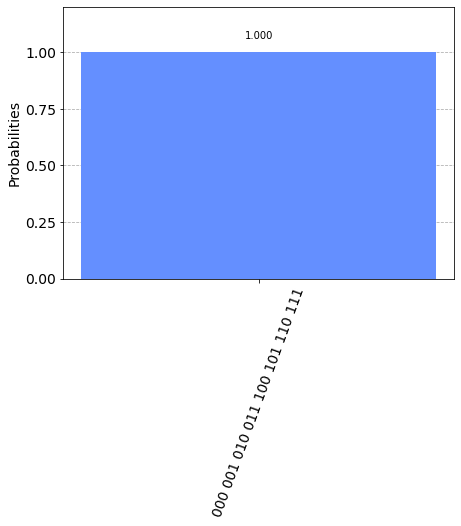

In [13]:
result = job.result()
plot_histogram(result.get_counts(circ))